<a href="https://colab.research.google.com/github/LauraDaniela09/Laboratorio-1--estadistica/blob/main/LABORATORIO_1_SE%C3%91ALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb
import matplotlib.pyplot as plt
import numpy as np
import wfdb
import os
from scipy.stats import norm

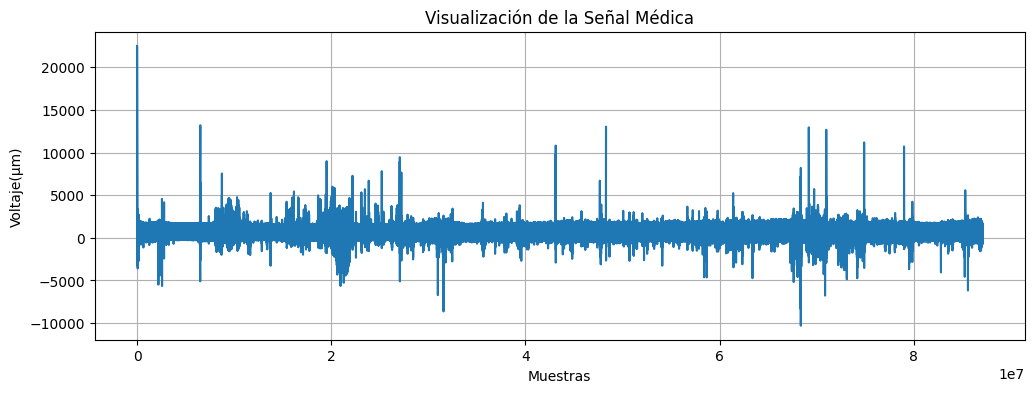

In [ ]:
local_file_path = '/100001_ECG'


señal,caracter = wfdb.rdsamp(local_file_path)

"""
print("Información del registro:")
print(f"Nombre del registro: {record.record_name}")
print(f"Número de señales: {record.n_sig}")
print(f"Nombres de las señales: {record.sig_name}")
print(f"Frecuencia de muestreo: {record.fs} Hz")
print(f"Duración de la señal: {record.sig_len / record.fs:.2f} segundos")
"""


plt.figure(figsize=(12, 4))
plt.plot(señal)
plt.title("Visualización de la Señal Médica")
plt.xlabel("Muestras")
plt.ylabel("Voltaje(μm)")
plt.grid(True)
plt.show()

caracter

signal=señal[2000000:2010000]

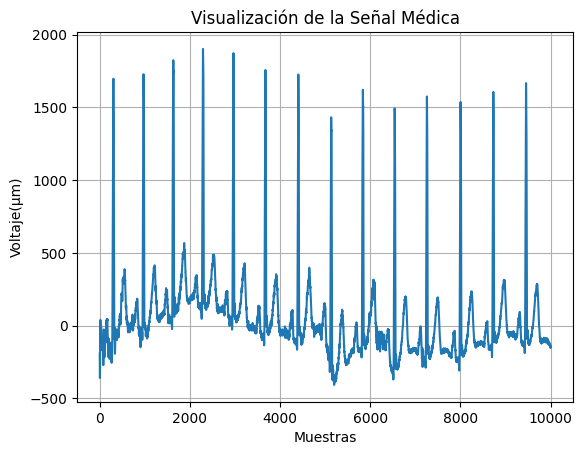

In [ ]:
plt.plot(signal)
plt.title("Visualización de la Señal Médica")
plt.xlabel("Muestras")
plt.ylabel("Voltaje(μm)")
plt.grid(True)
plt.show()

In [ ]:

suma = 0
n = 0
for muestra in signal:
  suma=suma+muestra
  n=n+1

  promedio=suma/n
print("promedio=", promedio)
print("promedio2=", np.mean(signal))



promedio= [51.83181363]
promedio2= 51.83181362725452


In [ ]:

suma = 0
n = 0
for muestra in signal:
    suma += muestra
    n += 1
sumaCuadrados = 0
for muestra in signal:
    diferencia = muestra - promedio
    sumaCuadrados += diferencia ** 2

varianza = sumaCuadrados / n
desviacionEstandar = varianza ** 0.5

print("Desviación Estándar:", desviacionEstandar)
print("varianza:", varianza)

Desviación Estándar: [312.3767537]
varianza: [97579.23625063]


In [ ]:
Coeficiente=(desviacionEstandar/promedio)*100
print("Coeficiente de Variacion:", Coeficiente)

Coeficiente de Variacion: [602.6737863]


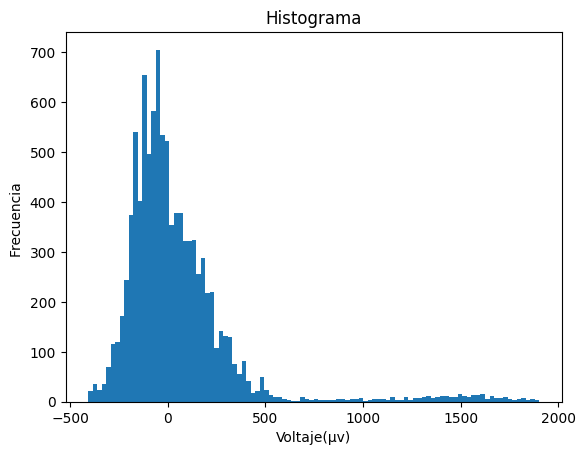

In [ ]:
plt.figure()
plt.hist(signal,bins=100,density=0)
plt.title("Histograma")
plt.xlabel("Voltaje(μv)")
plt.ylabel("Frecuencia ")
plt.show()


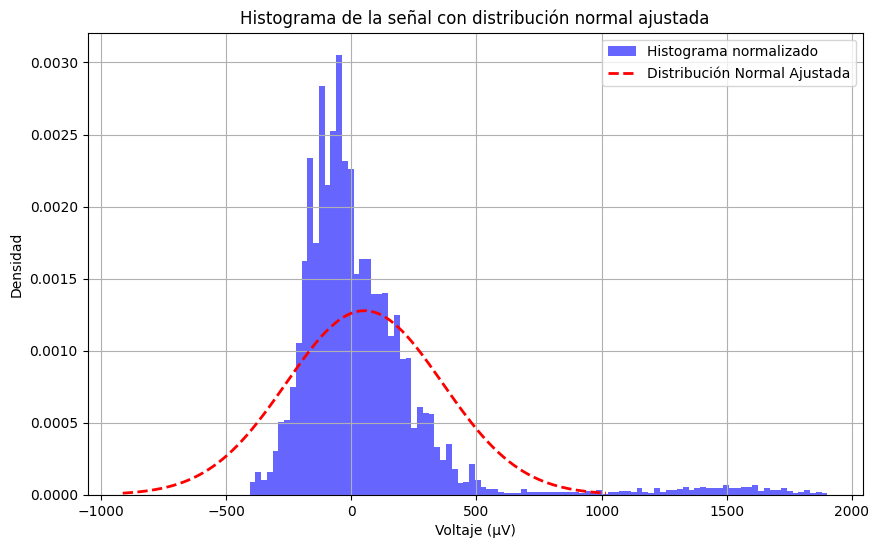

In [ ]:
media = np.mean(signal)
desviacion = np.std(signal)
dist = norm(loc=media, scale=desviacion)

# Graficar histograma normalizado
plt.figure(figsize=(10, 6))
plt.hist(signal, bins=100, density=True, alpha=0.6, color='blue', label='Histograma normalizado')

# Crear valores x para la PDF (entre percentiles 0.001 y 0.999)
x_vals = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 200)
pdf_vals = dist.pdf(x_vals)

# Graficar la curva de distribución normal
plt.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Distribución Normal Ajustada')

plt.title('Histograma de la señal con distribución normal ajustada')
plt.xlabel('Voltaje (μV)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

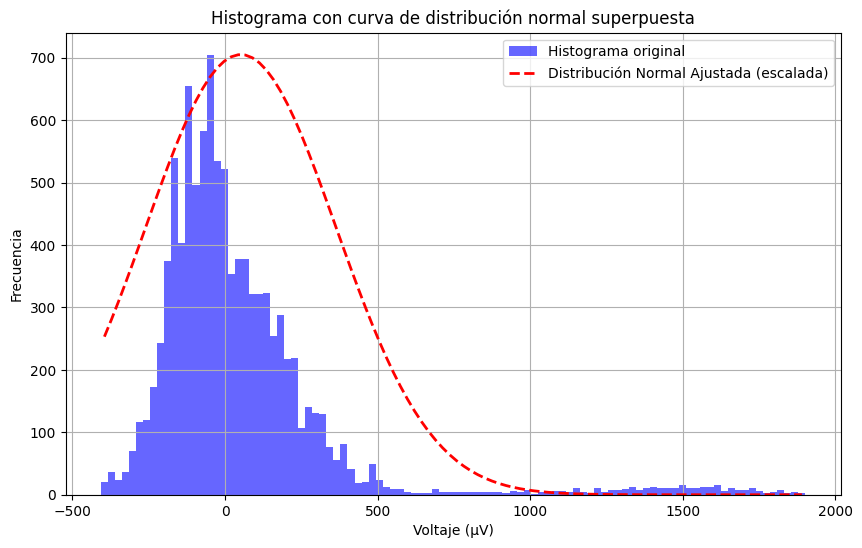

In [ ]:
media = np.mean(signal)
desviacion = np.std(signal)
dist = norm(loc=media, scale=desviacion)

# Obtener histograma (no graficar aún)
cuentas, bins = np.histogram(signal, bins=100)

# Calcular el centro de cada barra del histograma
centros = (bins[1:] + bins[:-1]) / 2

# Escalar la PDF a la altura del histograma (frecuencia absoluta)
pdf = dist.pdf(centros)
pdf_escalada = pdf * max(cuentas) / max(pdf)  # Ajusta alturas

# Graficar histograma original (sin density=True)
plt.figure(figsize=(10, 6))
plt.hist(signal, bins=100, alpha=0.6, color='blue', label='Histograma original')
plt.plot(centros, pdf_escalada, 'r--', linewidth=2, label='Distribución Normal Ajustada (escalada)')

# Etiquetas y leyenda
plt.title('Histograma con curva de distribución normal superpuesta')
plt.xlabel('Voltaje (μV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()

**PARTE B**

In [ ]:
import struct
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving RigolDS0.bin to RigolDS0.bin


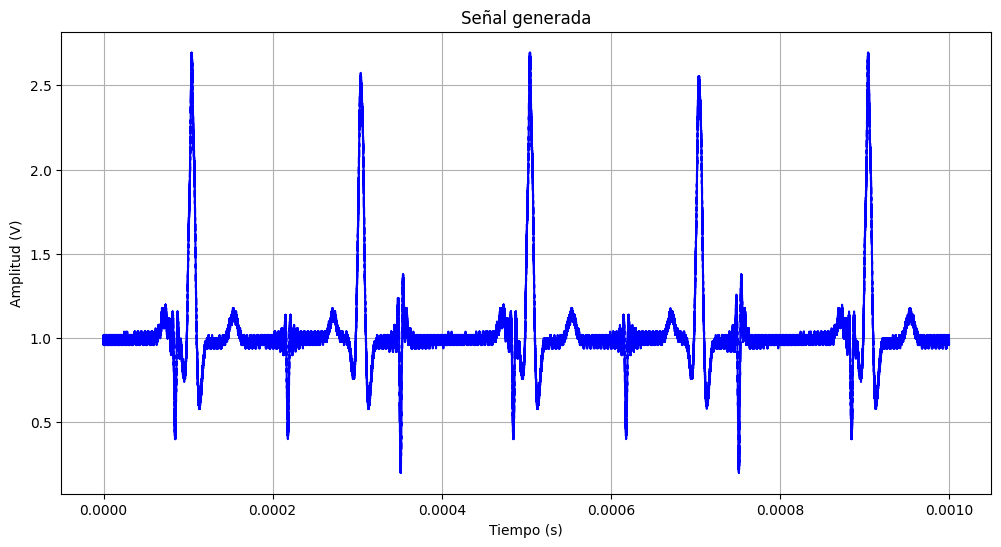

In [ ]:
file_path = "RigolDS0.bin"

with open(file_path, "rb") as f:
    data = f.read()

offset = 512  # Ajustar si es necesario

# Extraer los datos como flotantes (float32 little-endian)
signal = []
for i in range(offset, len(data), 4):
    try:
        val = struct.unpack('<f', data[i:i+4])[0]
        signal.append(val)
    except:
        break

time = [i * 1e-9 for i in range(len(signal))]

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(time, signal, color='blue')
plt.title("Señal generada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)
plt.show()

In [5]:
suma = 0
n = 0
for muestra in "RigolDS0.bin":
  suma=suma+muestra
  n=n+1

  promedio=suma/n
print("promedio"=,promedio)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (ipython-input-3773334639.py, line 8)